<div class="alert-success">
This is a green colored box
</div>

<div class="alert-danger">
This is a red colored box
</div>

<div class="alert-warning">
This is a yellow colored box
</div>

<div class="alert-info">
This is a blue colored box
</div>

<span style='color:red'> FONT COLOR </span>

# <span style='color:blue'>1- Importing necessary libraries</span>

In [1]:
import torch
import numpy as np
from collections import Counter
from torch_geometric.utils import remove_self_loops
import matplotlib.pyplot as plt
from utils import plot_pyg_data_with_pos



# <span style='color:blue'> 2- Loading the processed files and test whether the processed files are ok for moving forward </span>


In [22]:
dataset = torch.load('dataset/dataverse_files-2/Combined/Converted Dataset/20250406_TestGraphDatasetWithLabels_and_filenames.pt')
LabelMatrix = torch.load('./dataset/dataverse_files-2/Combined/Label Matrices/ZT76_39_A_1_1.jpg_label_matrix.pt')
triangulation  = torch.load('./dataset/dataverse_files-2/Combined/Triangulations/ZT76_39_A_1_1.jpg_triangulation.pt')
labelsTrain = torch.load('./dataset/dataverse_files-2/Combined/Labels/labels_train.pt')
labelsTestPathologist1 = torch.load('./dataset/dataverse_files-2/Combined/Labels/labels_test_pathologist1.pt')

print("Dataset loaded successfully.")

print(f'\nA sample of the Dataset: \n', dataset[0][0].y, dataset[0][1])
print(f'\nA sample of the LabelMatrix: \n', LabelMatrix)
print(f'\nA sample of the Triangulation: \n', triangulation)
print(f'\nA sample of the Train labels: \n', labelsTrain)
print(f'\nA sample of the Labels of Pathologist 1: \n', labelsTestPathologist1)


Dataset loaded successfully.

A sample of the Dataset: 
 tensor([1., 0., 0., 1., 0.]) ZT80_38_B_7_13

A sample of the LabelMatrix: 
 tensor([[   0,    0,    0,  ...,   31,   31,   31],
        [   0,    0,    0,  ...,   31,   31,   31],
        [   0,    0,    0,  ...,   31,   31,   31],
        ...,
        [ 992,  992,  992,  ..., 1023, 1023, 1023],
        [ 992,  992,  992,  ..., 1023, 1023, 1023],
        [ 992,  992,  992,  ..., 1023, 1023, 1023]], dtype=torch.int32)

A sample of the Triangulation: 
 Data(x=[1024, 7], pos=[1024, 2], edge_index=[2, 5684])

A sample of the Train labels: 
 [{'filename': 'mask_ZT76_39_A_8_4.png', 'colors': ['green', 'white']}, {'filename': 'mask_ZT111_4_A_8_13.png', 'colors': ['white', 'blue']}, {'filename': 'mask_ZT199_1_A_8_12.png', 'colors': ['white', 'blue']}, {'filename': 'mask_ZT204_6_B_1_8.png', 'colors': ['white', 'red']}, {'filename': 'mask_ZT111_4_C_2_3.png', 'colors': ['yellow', 'white']}, {'filename': 'mask_ZT111_4_B_5_14.png', 'colors': 

/var/folders/bn/yz9nrf9s393b2bxltkfvj6j80000gn/T/ipykernel_52689/2224202698.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('dataset/dataverse_files

<div class="alert-warning">
plotting one triangulation and its label map form confirmation that everything is ok
</div>

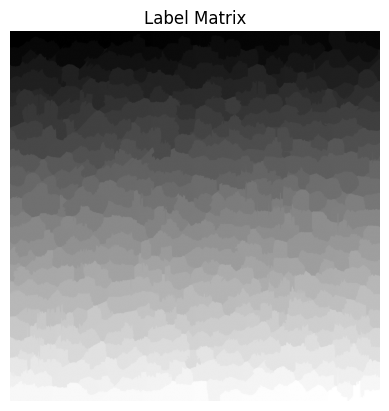


A sample of the Dataset: 
 tensor([[612, 238,  76,  ..., 248,  14, 874],
        [676, 206, 107,  ..., 214,  47, 905]])
<class 'torch.Tensor'>


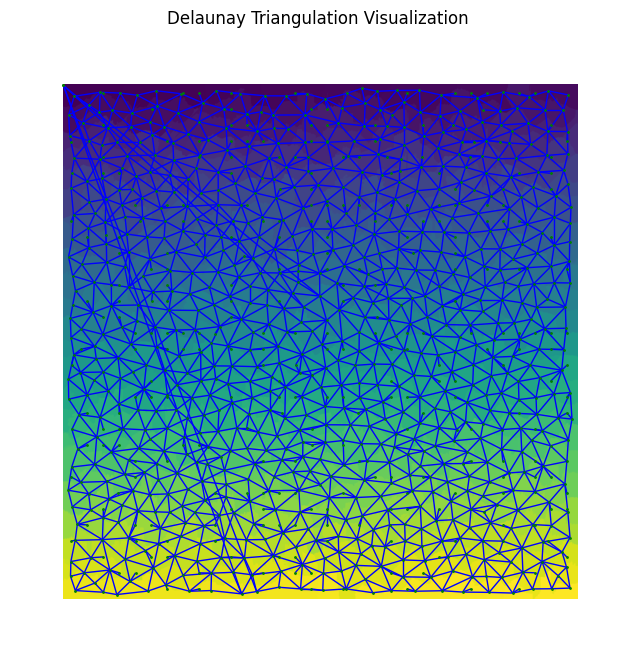

In [23]:

# Visualize the label matrix as an image
plt.imshow(LabelMatrix/1023, cmap='gray')
plt.title('Label Matrix')
plt.axis('off')
plt.show()

# Visualize the triangulation
triangulation.edge_index = torch.tensor(np.asarray(triangulation.edge_index))
triangulation.edge_index = remove_self_loops(triangulation.edge_index)[0]
print(f'\nA sample of the Dataset: \n', triangulation.edge_index)
print(type(triangulation.edge_index))
# Visualize the triangulation
plot_pyg_data_with_pos(data=triangulation, image=LabelMatrix, show_fig=True, save_fig=False)
plt.show()

# <span style='color:blue'> 3- Imbalance detection for the Train Dataset </span>
Duplicating the imbalanced images for the labels that has been represented less that the others.





## <span style='color: darkgreen'> 3.1- Distribution of the labels in the Label_train file </span>

After finding the distribution of the labels, we will store the their under-represented images into a new file. this file will be used to apply augmentation for the training to have a better and more balanced images.

In [ ]:
import torch
from collections import defaultdict
import csv

# === Step 1: Load the .pt file ===
# This assumes your .pt file is saved as a list of dicts, each like:
# {'filename': 'mask_XYZ.png', 'colors': ['white', 'green']}
data_list = torch.load('dataset/dataverse_files-2/combined/Labels/labels_train.pt')

# === Step 2: Prepare a dictionary to count combinations ===
# We'll use a defaultdict to store filenames grouped by color combination
# We use a tuple of sorted colors as the key so order doesn't matter
combo_to_filenames = defaultdict(list)

for entry in data_list:
    filename = entry['filename']
    colors = entry['colors']

    # Sort the colors so that ['green', 'white'] and ['white', 'green'] are treated the same
    sorted_colors = tuple(sorted(colors))

    # Add filename to the list for this color combination
    combo_to_filenames[sorted_colors].append(filename)

# === Step 3: Print out the statistics ===
# Sort combinations by how many images they have (ascending)
sorted_combos = sorted(combo_to_filenames.items(), key=lambda item: len(item[1]))

# print("Color combination statistics (sorted by frequency):\n")
# for combo, files in sorted_combos:
#     print(f"Combination: {combo} | Count: {len(files)}")
#     print("Filenames:")
#     for fname in files:
#         print(f"  - {fname}")
#     print("-" * 40)

# Save threshold: For example, combos with fewer than 10 images will be considered underrepresented
UNDERREP_THRESHOLD = 25

# Prepare to save underrepresented filenames
underrep_filenames = []

print("Underrepresented combinations (Count < 10):\n")
for combo, files in sorted_combos:
    if len(files) < UNDERREP_THRESHOLD:
        print(f"Combo: {combo} | Count: {len(files)}")
        for fname in files:
            print(f"  - {fname}")
            underrep_filenames.append((combo, fname))
        print("-" * 30)

# Save to CSV file
output_file = 'dataset/dataverse_files-2/Combined/underrepresented_Images/underrepresented_images.csv'
with open(output_file, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Color_Combination', 'Filename'])
    for combo, fname in underrep_filenames:
        writer.writerow([', '.join(combo), fname])

print(f"\n✅ Saved {len(underrep_filenames)} underrepresented image filenames to: {output_file}")


Underrepresented combinations (Count < 10):

Combo: ('blue', 'red', 'white') | Count: 3
  - mask_ZT199_1_B_6_9.png
  - mask_ZT111_4_A_7_11.png
  - mask_ZT111_4_B_8_4.png
------------------------------
Combo: ('blue', 'red', 'white', 'yellow') | Count: 7
  - mask_ZT111_4_B_5_14.png
  - mask_ZT111_4_A_7_2.png
  - mask_ZT111_4_A_6_10.png
  - mask_ZT111_4_B_2_1.png
  - mask_ZT111_4_C_1_12.png
  - mask_ZT111_4_A_4_5.png
  - mask_ZT111_4_A_1_12.png
------------------------------
Combo: ('red', 'white', 'yellow') | Count: 24
  - mask_ZT111_4_B_6_2.png
  - mask_ZT199_1_B_4_9.png
  - mask_ZT111_4_A_3_4.png
  - mask_ZT204_6_B_7_8.png
  - mask_ZT204_6_A_8_6.png
  - mask_ZT111_4_A_7_5.png
  - mask_ZT111_4_A_3_2.png
  - mask_ZT111_4_B_3_5.png
  - mask_ZT204_6_A_2_11.png
  - mask_ZT111_4_A_4_2.png
  - mask_ZT111_4_B_1_1.png
  - mask_ZT111_4_A_8_9.png
  - mask_ZT111_4_A_8_7.png
  - mask_ZT76_39_B_2_5.png
  - mask_ZT204_6_B_2_6.png
  - mask_ZT76_39_B_6_5.png
  - mask_ZT111_4_A_7_10.png
  - mask_ZT111_

/var/folders/bn/yz9nrf9s393b2bxltkfvj6j80000gn/T/ipykernel_52689/4256604278.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_list = torch.load('dataset/dataverse_fil

In [ ]:
! pip install albumentations opencv-python pillow


In [ ]:
import os
import csv
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

# === Configurations ===
# Folder containing your original images
input_image_folder = 'dataset/dataverse_files-2/Combined/Combined_images/'               
# Where to save augmented images
output_image_folder = 'dataset/dataverse_files-2/Combined/Augmented_images/'    
# Your saved CSV file from before
csv_file = 'dataset/dataverse_files-2/Combined/underrepresented_Images/underrepresented_images.csv'       
# How many augmented copies to make per image
augmentations_per_image = 4                    

# Create output folder if it doesn't exist
os.makedirs(output_image_folder, exist_ok=True)

# === Define the augmentation pipeline ===
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    # A.Rotate(limit=30, p=0.7),
    A.RandomBrightnessContrast(p=0.6),
    A.GaussNoise(p=0.3),
    A.ElasticTransform(p=0.2),
    A.HueSaturationValue(p=0.3),
])

# === Read the CSV file and apply augmentations ===
with open(csv_file, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        filename = row['Filename']
        base_name = os.path.splitext(filename)[0]

        image_path = os.path.join(input_image_folder, filename.replace('png', 'jpg').replace('mask_', ''))
        if not os.path.exists(image_path):
            print(f"⚠️ Warning: {str(image_path)} not found.")
            continue

        # Load image
        image = np.array(Image.open(image_path).convert('RGB'))

        # Apply multiple augmentations
        for i in range(augmentations_per_image):
            augmented = transform(image=image, )['image']
            aug_image = Image.fromarray(augmented)

            # Save augmented image
            aug_filename = f"{base_name}_aug{i+1}.png"
            aug_image.save(os.path.join(output_image_folder, aug_filename))

print("✅ Augmentation completed!")


⚠️ Warning: dataset/dataverse_files-2/Combined/Combined_images/ white not found.
✅ Augmentation completed!
